# Curve

In [1]:
import numpy as np
import euchar.curve as c
import euchar.filtrations as f

In [2]:
from euchar.display import matplotlib_plot, euler_curve_plot, euler_surface_plot, piecewise_constant_curve#
%matplotlib inline

In [3]:
np.random.seed(0)
N = 100
img1 = np.random.randint(0, 256, (32,32))
img2 = np.random.randint(0, 256, (32,32))
IMG1 = np.random.randint(0, 256, (32,32,32))
IMG2 = np.random.randint(0, 256, (32,32,32))

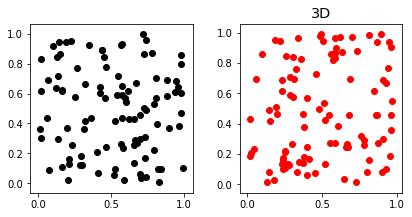

In [4]:
np.random.seed(0)
N = 100
pts2 = np.random.rand(N, 2)
pts3 = np.random.rand(N, 3)
fig, ax = matplotlib_plot(1, 2, figsize=(3,3))
ax[0].scatter(pts2[:,0], pts2[:,1], c="k")
ax[1].scatter(pts3[:,0], pts3[:,1], c="r")
ax[1].set(title="3D");

In [5]:
simplices_2d, alpha_2d = f.alpha_filtration_2D(pts2)
density_2d = f.inverse_density_filtration(pts2, simplices_2d, n_neighbors=6)

In [6]:
import seaborn as sns

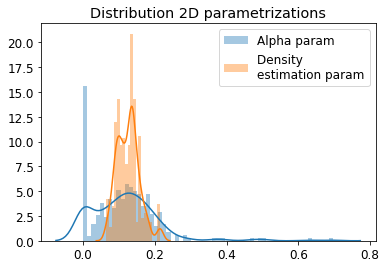

In [7]:
ax = sns.distplot(alpha_2d, label="Alpha param", bins=60)
ax = sns.distplot(density_2d, label="Density \nestimation param", bins=20)
ax.set(title="Distribution 2D parametrizations"); ax.legend();

In [8]:
simplices_3d, alpha_3d = f.alpha_filtration_3D(pts3)
density_3d = f.inverse_density_filtration(pts3, simplices_3d, n_neighbors=6)

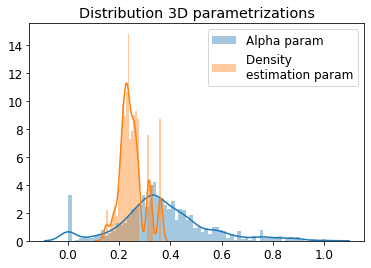

In [9]:
ax = sns.distplot(alpha_3d, label="Alpha param", bins=70)
ax = sns.distplot(density_3d, label="Density \nestimation param", bins=30)
ax.set(title="Distribution 3D parametrizations"); ax.legend();

***


### image_2D

In [10]:
ecc = c.image_2D(img1)

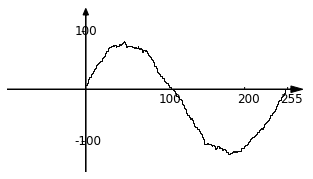

In [11]:
fig, ax = matplotlib_plot(figsize=(5,3))
euler_curve_plot(fig, ax, np.linspace(0, 255, num=256), ecc, 
                 xlim=[-100, 280], ylim=[-150, 150],
                 xticks=[100, 200, 255], yticks=[-100, 100],
                 y_arrow_head_width=7)

### image_3d

In [12]:
v = np.load("C:\\Users\\44792\\data\\research\\vectors_euler_changes\\changes_3d.npy")

In [13]:
ecc3d = c.image_3D(IMG1, v)

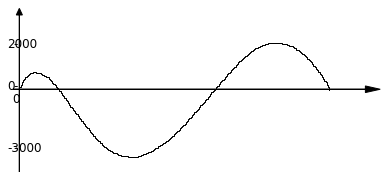

In [17]:
fig, ax = matplotlib_plot(figsize=(6,3))
bins3d = np.linspace(0, 255, 256)
euler_curve_plot(fig, ax, bins3d, ecc3d, 
                 yticks=[-3_000, 0, 2_000],
                 xlim=[-5, 300], ylim=[-4000, 4000],
                 y_arrow_head_width=5)

### Filtrations point clouds

In [18]:
bins2d = np.linspace(0, 0.8, 200)
ecc_pts2 = c.filtration(simplices_2d, alpha_2d, bins2d)

In [19]:
bins3d = np.linspace(0, 1.1, 200)
ecc_pts3 = c.filtration(simplices_3d, alpha_3d, bins3d)

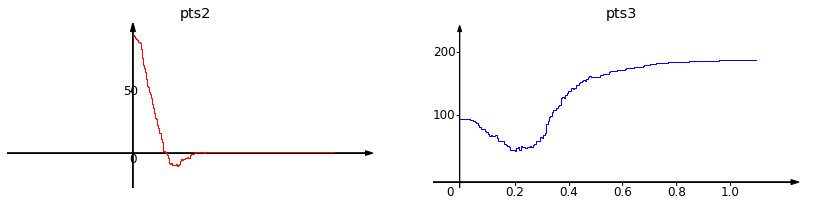

In [22]:
fig, ax = matplotlib_plot(1, 2, figsize=(6,3))
euler_curve_plot(fig, ax[0], bins2d, ecc_pts2, title="pts2",
                 yticks=[50], line_color="r", line_width=1,
                 xlim=[-0.5, 1], ylim=[-30, 110],
                 x_arrow_head_width=4, x_arrow_head_length=0.03,
                 y_arrow_head_width=0.02, y_arrow_head_length=8)

dx =0.03
euler_curve_plot(fig, ax[1], bins3d, ecc_pts3, title="pts3", line_color="b",
                 yticks=[100, 200], xticks=[0, 0.2, 0.4, 0.6, 0.8, 1.0],
                 xticks_locations=[(-0.05, -20),(0.2-dx, -20), (0.4-dx, -20),  
                                   (0.6-dx, -20),  (0.8-dx, -20),  (1-dx, -20)],
                 yticks_locations=[(-0.1, 100), (-0.1, 200)],
                 xlim=[-0.1, 1.3], ylim=[-10, 250], 
                 x_arrow_head_width=8, x_arrow_head_length=0.03,
                 y_arrow_head_width=0.015, y_arrow_head_length=10,
                 xticks_spacing=(0, -15), yticks_spacing=(-0.015, 0))

### Test correctedness

In [23]:
def py_curve(bins, simplices, parametrization):
    
    ecc= []
    def dim_simpl(sim):
        return sum(sim != -1) - 1
    print("Final bins values:", bins[-10:])
    print("Maxmium param:", parametrization.max())
    for s in bins:
        local_simplices = np.copy(simplices)
        mask = parametrization <= s
        #print(mask.shape)
        local_simplices = local_simplices[mask]
        #print([dim_simpl(sim) for sim in local_simplices])
        ecc.append(sum([(-1)**dim_simpl(sim) for sim in local_simplices]))
    
    return np.array(ecc)

In [24]:
pycurve2d = py_curve(bins2d, simplices_2d, alpha_2d)

all(pycurve2d == ecc_pts2)

Final bins values: [0.7638191 0.7678392 0.7718593 0.7758794 0.7798995 0.7839196 0.7879397
 0.7919598 0.7959799 0.8      ]
Maxmium param: 0.6971820099328677


True

In [25]:
pycurve3d = py_curve(bins3d, simplices_3d, alpha_3d)

all(pycurve3d == ecc_pts3)

Final bins values: [1.05025126 1.05577889 1.06130653 1.06683417 1.07236181 1.07788945
 1.08341709 1.08894472 1.09447236 1.1       ]
Maxmium param: 1.0066480506727837


True